In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('iris.data', names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
154,6.3,2.5,5.0,1.9,Iris-virginica
155,6.5,3.0,5.2,2.0,Iris-virginica
156,6.5,3.0,5.2,2.0,NaN
157,6.2,3.4,5.4,2.3,Iris-virginica


<div dir=rtl>
<b>
سوال اول
</b>
خروجی سلول زیر نشان دهنده تعداد مقادیر 
Nan
است.
</div>

In [4]:
df.isna().sum()

sepal_length    2
sepal_width     0
petal_length    2
petal_width     3
target          3
dtype: int64

<div dir=rtl>
<b>
سوال دوم:
</b>
در سلول زیر مقادیر Nan حذف شده اند.
</div>

In [5]:
# removing rows with target equal to Nan
df.dropna(subset=df.columns, inplace=True)

df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

<div dir=rtl>
<b>
سوال سوم
</b>
این روش رمزگذاری باعث ایجاد تقدم و تاخر بین مقادیر می شود. برای مثال در رمز گذاری 
[dog,cat,dog,mouse,cat] ===> [1,2,1,3,2]
میانگین بین سگ و موش گربه می شود.
</div>

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [7]:
set(df['target'])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [8]:
cls_lst = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
le.fit(cls_lst)

LabelEncoder()

In [9]:
x = le.transform(df['target'])
df.loc[:, 'target'] = x
df


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
153,6.7,3.0,5.2,2.3,2
154,6.3,2.5,5.0,1.9,2
155,6.5,3.0,5.2,2.0,2
157,6.2,3.4,5.4,2.3,2


<div dir=rtl>
<b>
سوال چهارم: 
</b>
در این روش به ازای هر مقدار متغیر 
categorical 
ما یک ستون ایجاد شده و مقادیر آن با صفر و یک پر می شوند.
برای مثال فرض کنید که در همین مجموعه داده برای هرکدام از ویژگی های 
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
یک ستون داشته باشیم و با صفر و یک وجود یا عدم وجود آن هارا مشخص کنیم. این کار هرچند باعث می شود که مشکل ما با رمزگذاری قبلی حل شود، اما در نهایت باعث افزایش ابعاد دیتاست ما میشود. بنابراین پیشنهاد می شود در کنار این روش از 
PCA 
نیز استفاده شود.
</div>

<div dir=rtl>
<b>
سوال چهارم: 
</b>
در این بخش می توانید مقادیر خواسته شده را قبل و بعد از نورمال سازی مشاهده کنید.
</div>

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
df.drop('target' , axis=1).mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [12]:
df.drop('target' , axis=1).var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [13]:
scaler = StandardScaler()
scaler.fit(df.drop('target' , axis=1))

StandardScaler()

In [14]:
from copy import deepcopy
x = scaler.transform(df.drop('target' , axis=1))
print(x.shape)
tmp_df = pd.DataFrame(np.c_[x,np.array(df['target'].values[:,None])], columns=df.columns)
tmp_df

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.032057,-1.341272,-1.312977,0.0
1,-1.143017,-0.124958,-1.341272,-1.312977,0.0
2,-1.385353,0.337848,-1.398138,-1.312977,0.0
3,-1.506521,0.106445,-1.284407,-1.312977,0.0
4,-1.021849,1.263460,-1.341272,-1.312977,0.0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2.0
146,0.553333,-1.281972,0.705893,0.922064,2.0
147,0.795669,-0.124958,0.819624,1.053537,2.0
148,0.432165,0.800654,0.933356,1.447956,2.0


In [15]:
tmp_df.drop('target' , axis=1).mean()

sepal_length   -2.775558e-16
sepal_width    -5.140333e-16
petal_length    1.154632e-16
petal_width     9.251859e-16
dtype: float64

In [16]:
tmp_df.drop('target' , axis=1).var()

sepal_length    1.006711
sepal_width     1.006711
petal_length    1.006711
petal_width     1.006711
dtype: float64

In [17]:
df = tmp_df

<div dir=rtl>
<b>
سوال ششم
</b>
</div>

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df.drop('target' , axis=1))

PCA(n_components=2)

<div dir=rtl>
<b>
سوال هفتم
</b>
</div>

In [19]:
points = pca.transform(df.drop('target' , axis=1))

In [20]:
import matplotlib.pyplot as plt

Iris-setosa
Iris-versicolor
Iris-virginica


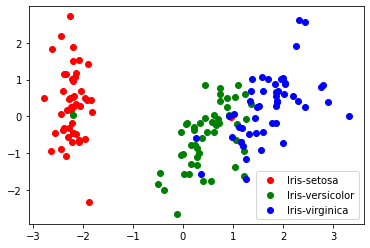

In [21]:
colors = ['r','g','b','y']
fig, ax = plt.subplots()
for cls in df['target'].unique():
  cls_name = le.inverse_transform([int(cls)])[0]
  indx = df[df['target'] == cls].index - 1
  print(cls_name)
  ax.scatter(points[indx,0] , points[indx,1] , c=colors[int(cls)] , label = cls_name)
ax.legend()
plt.show()

In [22]:
df_bp = pd.read_csv('iris.data', names=['sepal_length','sepal_width','petal_length','petal_width','target'])

<div dir=rtl>
<b>
سوال هشتم : 
</b>
</div>

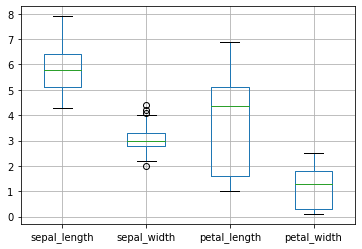

In [23]:
df_bp.dropna(subset=df_bp.columns, inplace=True)
boxplot = df_bp.boxplot(column=['sepal_length','sepal_width','petal_length','petal_width'])